# Business Case: Axis Bank
Axis bank is trying to categorize its customers for better advertising their credit card service and have more number of customers rolling for the service. The Data Science team has been tasked to classify the customers based on their expenditures, family size, age, and marital status.

The column profile looks as follows,

| id | features | description |
| :-: | :-: | :-: |
|01| ID | ID of the Customer |
|02| Gender | Customer is a Male or Female |
|03| Ever_Married | Customer is married or not |
|04| Age | Age of the Customer |
|05| Graduated | Customer has graduated or not |
|06| Profession | Profession of Customer |
|07| Work_Experience | Work Exp of Customer, ranges from (0 - 14) |
|08| Spending_Score | Customer Expenditure scores |
|09| Family_Size | Family size of the Customer, ranges from (1 - 9) |
|10| Var_1 | Categorizing Customers as (Cat_1, Cat_2, Cat_3, Cat_4) |
|11| Segmentation | Categorizing Customers as (A, B, C, D) |

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
# loading the dataset
df = pd.read_csv("axis_bank.csv")
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


Observe that `Segmentation` and `Var_1` say the same thing, hence, either one of them can be dropped.

In [3]:
# dropping "ID" and "Var_1"
df.drop(columns = ["ID", "Var_1"], inplace = True)
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,D
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,B
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,A


In [4]:
df.isna().sum()

Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Segmentation         0
dtype: int64

Observe that there are null values present in the dataset.

In [5]:
# dropping all the null values
df.dropna(inplace = True)
df.isna().sum()

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Segmentation       0
dtype: int64

In [6]:
# shape of the data after all the above manipulations
df.shape

(6718, 9)

# EDA

In [7]:
# checking for categorical columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6718 entries, 0 to 8067
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           6718 non-null   object 
 1   Ever_Married     6718 non-null   object 
 2   Age              6718 non-null   int64  
 3   Graduated        6718 non-null   object 
 4   Profession       6718 non-null   object 
 5   Work_Experience  6718 non-null   float64
 6   Spending_Score   6718 non-null   object 
 7   Family_Size      6718 non-null   float64
 8   Segmentation     6718 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 524.8+ KB


The categorical columns are,
- Gender
- Ever_married
- Graduated
- Profession
- Spending_Score
- Segmentation

In [8]:
for i in df.columns:
    print(f"Column Name: {i}, Number of unique elements: {df[i].nunique()}")
    print()

Column Name: Gender, Number of unique elements: 2

Column Name: Ever_Married, Number of unique elements: 2

Column Name: Age, Number of unique elements: 67

Column Name: Graduated, Number of unique elements: 2

Column Name: Profession, Number of unique elements: 9

Column Name: Work_Experience, Number of unique elements: 15

Column Name: Spending_Score, Number of unique elements: 3

Column Name: Family_Size, Number of unique elements: 9

Column Name: Segmentation, Number of unique elements: 4



### Which encoding technique to use to encode the target variable `Segmentation`?
One Hot Encoding the target variable would be the best way to go.

Also, since it is a multi-class classification problem, `CategoricalCrossentropy` will be used as the loss function.

In [9]:
# storing the class labels
class_labels = df["Segmentation"]
df = pd.get_dummies(df, columns = ["Segmentation"], dtype = "int16")
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation_A,Segmentation_B,Segmentation_C,Segmentation_D
0,Male,No,22,No,Healthcare,1.0,Low,4.0,0,0,0,1
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,0,1,0,0
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,0,1,0,0
5,Male,Yes,56,No,Artist,0.0,Average,2.0,0,0,1,0
6,Male,No,32,Yes,Healthcare,1.0,Low,3.0,0,0,1,0


### How to encode the remaining categorical features?
Any of the encoding techniques can be applied. In this instance, OHE is applied.

In [10]:
# separating the features and label
x = df.drop(columns = ["Segmentation_A", "Segmentation_B", "Segmentation_C", "Segmentation_D"])
y = df[["Segmentation_A", "Segmentation_B", "Segmentation_C", "Segmentation_D"]]
x = pd.get_dummies(x, columns = ["Gender", "Ever_Married", "Graduated", "Profession", "Spending_Score"], dtype = "int16")
pd.set_option('display.max_columns', None)
x.head()

,Age,Work_Experience,Family_Size,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Spending_Score_Average,Spending_Score_High,Spending_Score_Low
0,22,1.0,4.0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
2,67,1.0,1.0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1
3,67,0.0,2.0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0
5,56,0.0,2.0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0
6,32,1.0,3.0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1


In [11]:
# splitting the dataset into train, validation and test set
from sklearn.model_selection import train_test_split

x_train_val, x_test, y_train_val, y_test = train_test_split(x, y, test_size = 0.1, random_state = 42)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size = 0.1, random_state = 42)
x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

((5441, 21), (5441, 4), (605, 21), (605, 4), (672, 21), (672, 4))

Observe that 10% of the data is used for validation and testing, the remaining data is used for training.

Also, note that, standardizing the data is important because it helps the algorithm reach the global minima faster.

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

# Baseline Model
The model has the following 6 layers,

| layer | description |
| :-: | :-: |
| L1 | Input Layer |
| L2 | Contains 64 Neurons |
| L3 | Contains 32 Neurons |
| L4 | Contains 16 Neurons |
| L5 | Contains 8 Neurons |
| L6 | Output Layer |

ReLU is used as the activation function.

In [13]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# setting the seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [14]:
def baseline_model():
    model = Sequential(
        [
            Dense(64, activation = "relu", kernel_initializer = "glorot_uniform"),
            Dense(32, activation = "relu", kernel_initializer = "glorot_uniform"),
            Dense(16, activation = "relu", kernel_initializer = "glorot_uniform"),
            Dense(8, activation = "relu", kernel_initializer = "glorot_uniform"),
            Dense(4, activation = "sigmoid")
        ]
    )

    return model

model = baseline_model()

`Adam` is used as the optimizer and Precision and Recall are used as metrics (Accuracy is not the correct metric to be used for multi-class classification problem).

In [15]:
model.compile(optimizer = tf.keras.optimizers.Adam(), loss = tf.keras.losses.CategoricalCrossentropy(), metrics = ["precision", "recall"])

# training the model "epochs = 10" and "batch_size = 128"
history = model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 10, batch_size = 128, verbose = 0)

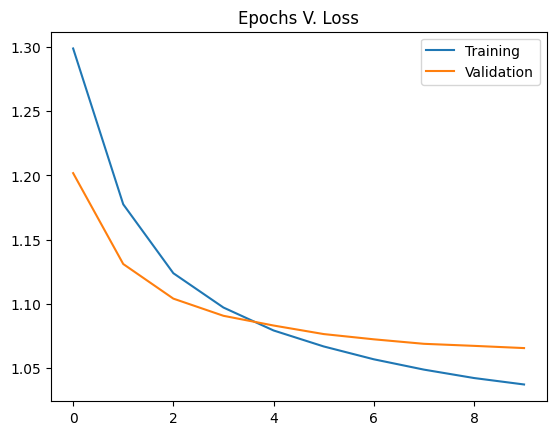

In [16]:
epochs = history.epoch
loss = history.history["loss"]
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, label = "Training")
plt.plot(epochs, val_loss, label = "Validation")
plt.legend()
plt.title("Epochs V. Loss")
plt.show()

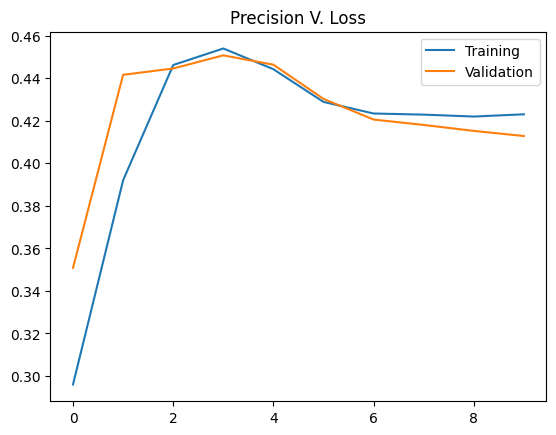

In [17]:
epochs = history.epoch
precision = history.history["precision"]
val_precision = history.history["val_precision"]
plt.plot(epochs, precision, label = "Training")
plt.plot(epochs, val_precision, label = "Validation")
plt.legend()
plt.title("Precision V. Loss")
plt.show()

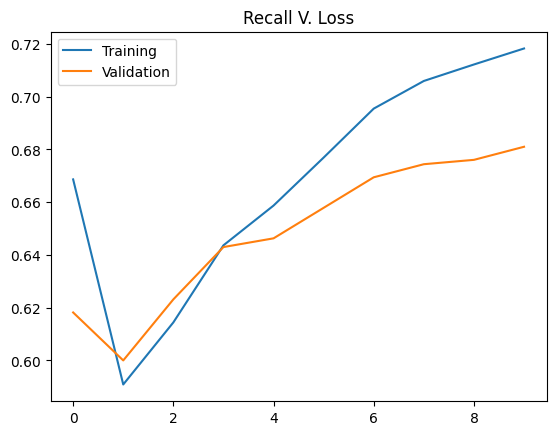

In [18]:
epochs = history.epoch
recall = history.history["recall"]
val_recall = history.history["val_recall"]
plt.plot(epochs, recall, label = "Training")
plt.plot(epochs, val_recall, label = "Validation")
plt.legend()
plt.title("Recall V. Loss")
plt.show()

Observe that after 10 epochs, the model still has high loss. Precision is around 44% and Recall is around 72%.

# Orthogonalization
### What all can be done to get the model to perform better?
The following is a list of things that can be done to improve the model's performance,
- Increase the number of epochs.
- Increase the number of layers.
- Add Regularization (L2).
- Batch Normalization.
- Dropout
- Decrease the Learning Rate.
- Choose a different Optimizer or Loss Function.
- Collect more data.

As all of the above increase performance, it is important to know which one to use in order to achieve the desired results, else a lot of time will be spent on experiments.

This process of knowing what to tune in order to achieve one effect is called Orthogonalization.

### What to tweak when the Neural Network has bad training Accuracy?
Neural Network is underfitting. In such a case,
- Increase the number of epochs.
- Try a different optimizer (preferrably Adam).
- Increase the number of layers.
- Collect more data.

### What to tweak when the Neural Network has bad validation Accuracy?
Neural Network is overfitting. In such cases,
- Use a simpler Neural Network (lesser number of layers).
- Add Regularization.
- Batch Normalization.
- Dropout.
- Use bigger training data with diverse samples.

### What is diverse samples in training data?
The new samples should be completely different from the original training set.

### What to tweak when the test Accuracy is bad (the model fits well on training and validation data but performs poorly in the test data)?
The chances of this happening are low, but if this does happen,
- Increase the size of the validation data.
- Choose a different Loss Function for the model.

### Why getting more data shouldn't be the go to thing?
The following are the reasons,
- Some data is hard to get.
- Collecting data is time intensive.
- Sometimes, months can be spent over collecting the data, yet the model's performance barely or does not increase.

### What are the main hyperparameters to look for when using a Neural Network?
The main hyperparameters to tune in a Neural Network,
- Learning rate ($\alpha$).
- $\beta$ value of the Gradient Descent with Momentum.
- $\beta_1$, $\beta_2$, $\epsilon$ when using Adam.
- Number of layers.
- Number of Neurons or hidden units to be used.
- Learning rate decay.
- Batch size.

### Among the above mentioned hyperparameter, which ones to tune first?
1. Learning Rate ($\alpha$): This is because, most of the times, due to an incorrect $\alpha$ the model fails to reach global minima.
2. $\beta$ value of the Gradient Descent with Momentum: The value of 0.9 (default) is a good value.
3. Number of Neurons or hidden units to be used: This helps in making the model more complex.
4. Batch size: A right batch size should be found such that there is equal distribution of data in every epoch.
5. Number of layers: Changing the number of layers, changes the Neural Network entirely. Hence, this should be one of the last hyperparameter that should be considered to tune.
6. Learning rate decay: If after getting the best learning rate, the model still does not perform well. It is a good practive to perform a decay of the learning rate over epochs.
7. $\beta_1$, $\beta_2$, $\epsilon$ when using Adam: Though these are not recommended to be tuned, but sometimes tuning them would help the model to converge to the global minima.

### How to find the best values of various hyperparameters?
`GridSearchCV`.

### If there are N hyperparameters, will `GridSearchCV` be the right approach then?
No, as the number of hyperparameters increase, the time taken by `GridSearchCV` also increases. Hence, `RandomSearchCV` would be a better approach in this case.

Once `RandomSearchCV` is performed, select the region or area of the best hyperparameter and `GridSearchCV` can be performed on this selected region. This way helps in getting a good approximation of the best hyperparameters before `GridSearchCV` is performed.

# Gradient Checking

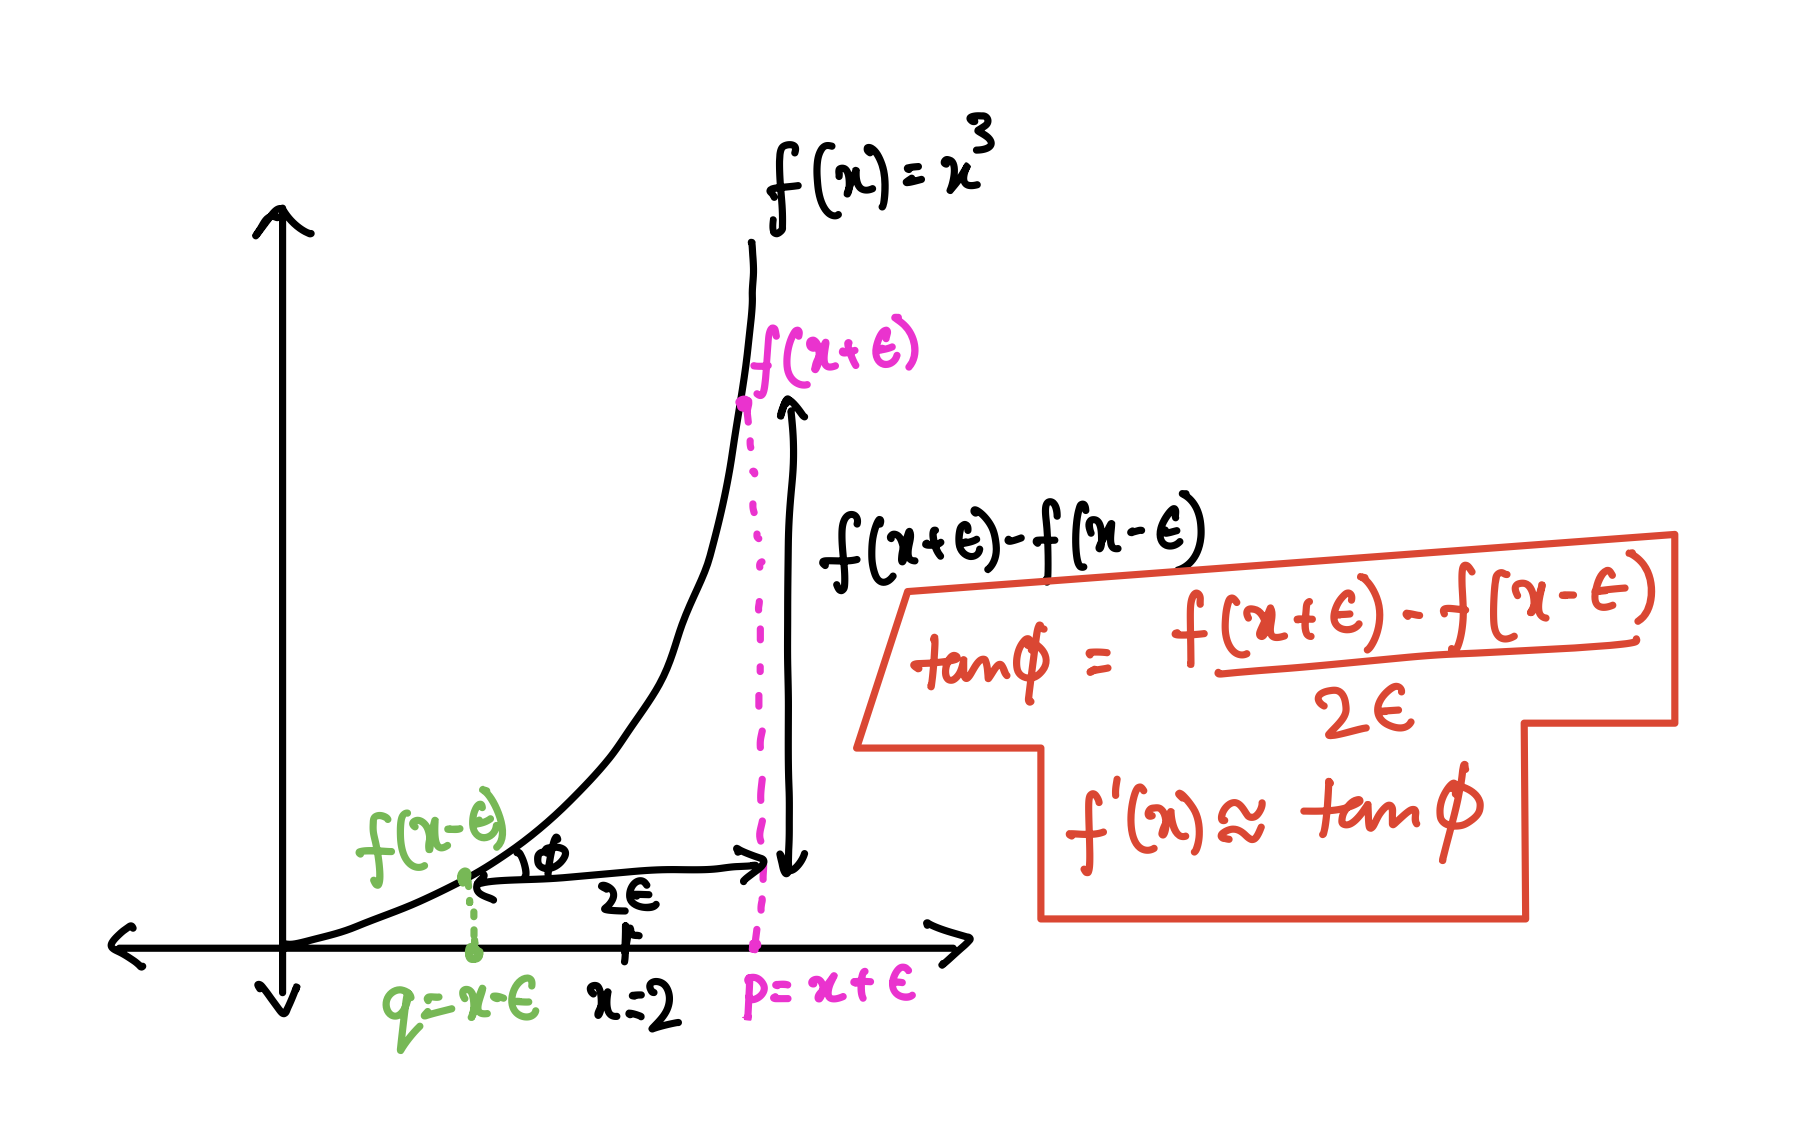

The major problems with Neural Networks is that it is black box interpretation.

### Why is it that sometimes even after a series of correct hyperparameters, the Neural Network does not perform well?
This is due to gradient and backpropagation not performing correctly. It can happen due to some bug or issue in gradient calculation.

### How to check of the gradients from backpropagation are correct?
To verify the correctness of backpropagation, the calculated gradient can be compared with approximations of the true gradients.

### How to calculate approximate gradient value?
Consider that there is a function, $f(x) = x^3$, and the plot of it looks like the one shown in the above image. Now, if 2 points $p$ and $q$ are taken from a point $x = 2$, such that,
- $p = x + \epsilon$. Where, $\epsilon = 0.01$
- $q = x - \epsilon$. Where, $\epsilon = 0.01$

Consider the triangle created by the points $p$ and $q$,
- The base of the triangle is, $p - q = x + \epsilon - x - \epsilon = 2\epsilon$.
- The height of the triangle becomes, $f(p) - f(q) = f(x + \epsilon) - f(x - \epsilon)$.

Recall from Calculus that the derivative of a function $f'(x) = \tan$ of the triangle created by the points on the function is $\tan = \frac{f(x + \epsilon) - f(x - \epsilon)}{2\epsilon}$.

The value of $\tan$ becomes, $\tan = \frac{2.01^3 - 1.99^3}{2 * 0.01} = \frac{8.120601 - 7.880599}{0.02} = 12.001$.

The derivative of $f(x)$ is, $f'(x) = 3x^2 = 3(2)^2 = 12$.

Hence, $\frac{f(x + \epsilon) - f(x - \epsilon)}{2\epsilon} ≈ f'(x)$.

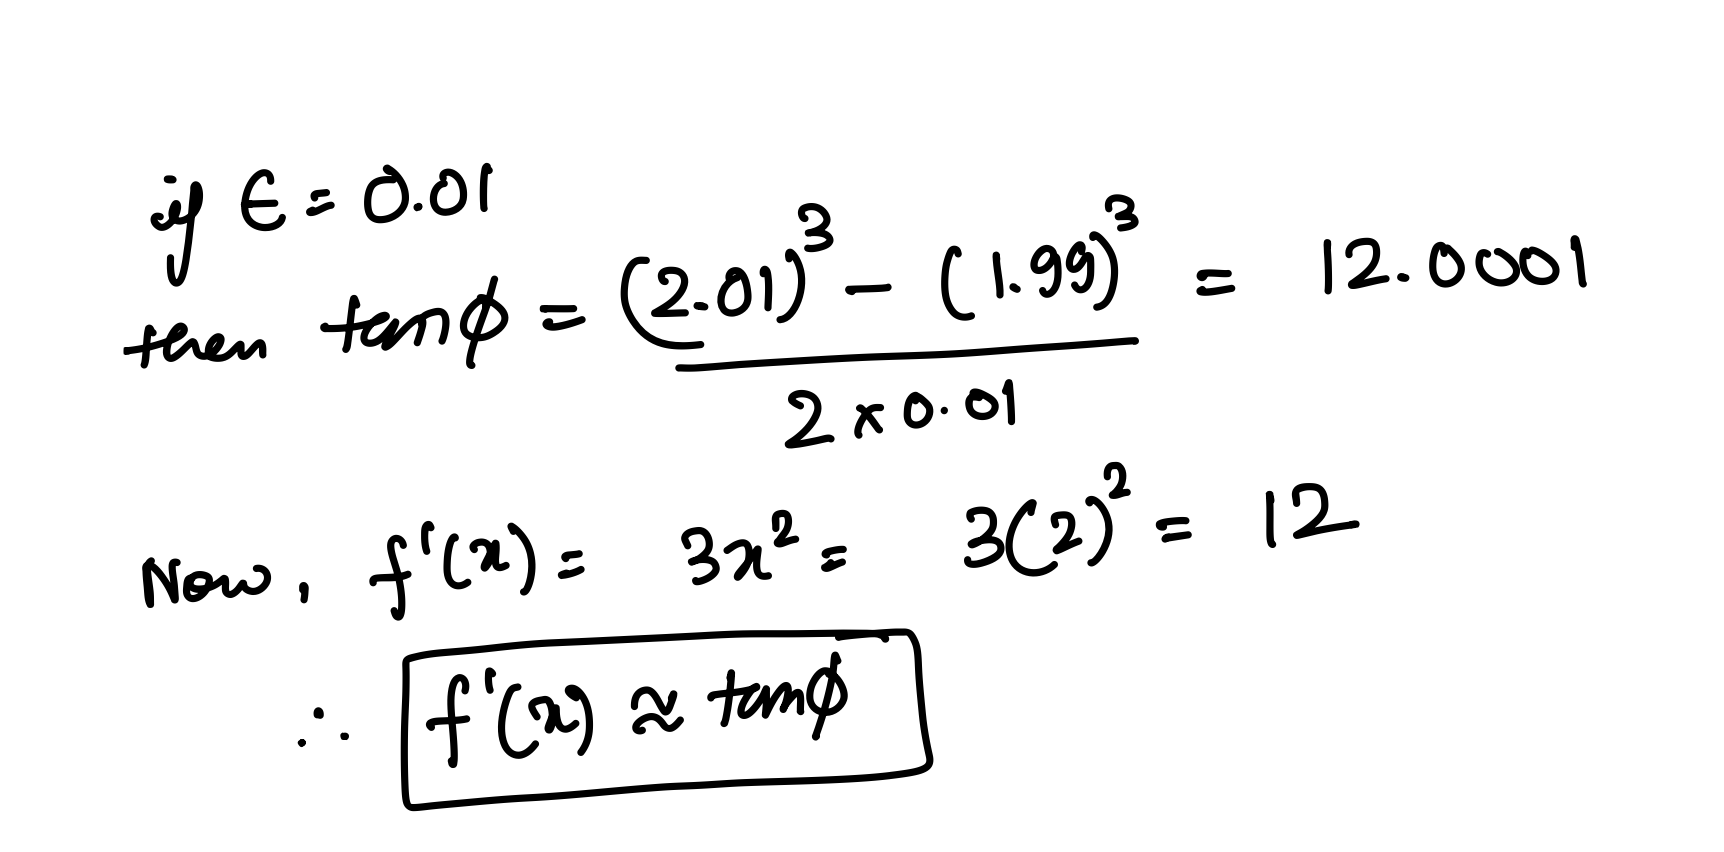

### How to perfrom gradient approximation in Neural Network?
For backpropagation, every layer of the Neural Network has,
- $[w^1, b^1], [w^2, b^2], [w^3, b^3], ..., [w^L, b^L]$.
- Derivative, $[\Delta w^1, \Delta b^1], [\Delta w^2, \Delta b^2], [\Delta w^3, \Delta b^3], ..., [\Delta w^L, \Delta b^L]$.
- Loss is a function of $w^1, b^1, w^2, b^2, w^3, b^3, ..., w^L, b^L$, represented by, $Loss(w^1, b^1, w^2, b^2, w^3, b^3, ..., w^L, b^L)$.

Weights and derivatives are 2D matrices.

A single dimensional vector is created for every layer by unrolling the weights and bias matrix and concatinating such that, $\theta_1 = [w^1, b^1], \theta_2 = [w^2, b^2], \theta_3 = [w^3, b^3], ..., \theta_L = [w^L, b^L]$.

Similarly the derivatives become, $\Delta \theta_1 = [w^1, b^1], \Delta \theta_2 = [w^2, b^2], \Delta \theta_3 = [w^3, b^3], ..., \Delta \theta_L = [w^L, b^L]$.

And the loss becomes, $Loss(\theta_1, \theta_2, ..., \theta_L)$.

$\theta_1, \theta_2, ..., \theta_L$ are concatenated into a single vector $\theta$. Therefore, $\theta = [\theta_1, \theta_2, ..., \theta_L]$.

The loss becomes, $Loss(\theta) = Loss(\theta_1, \theta_2, ..., \theta_L)$.

This is known as gradient checking.

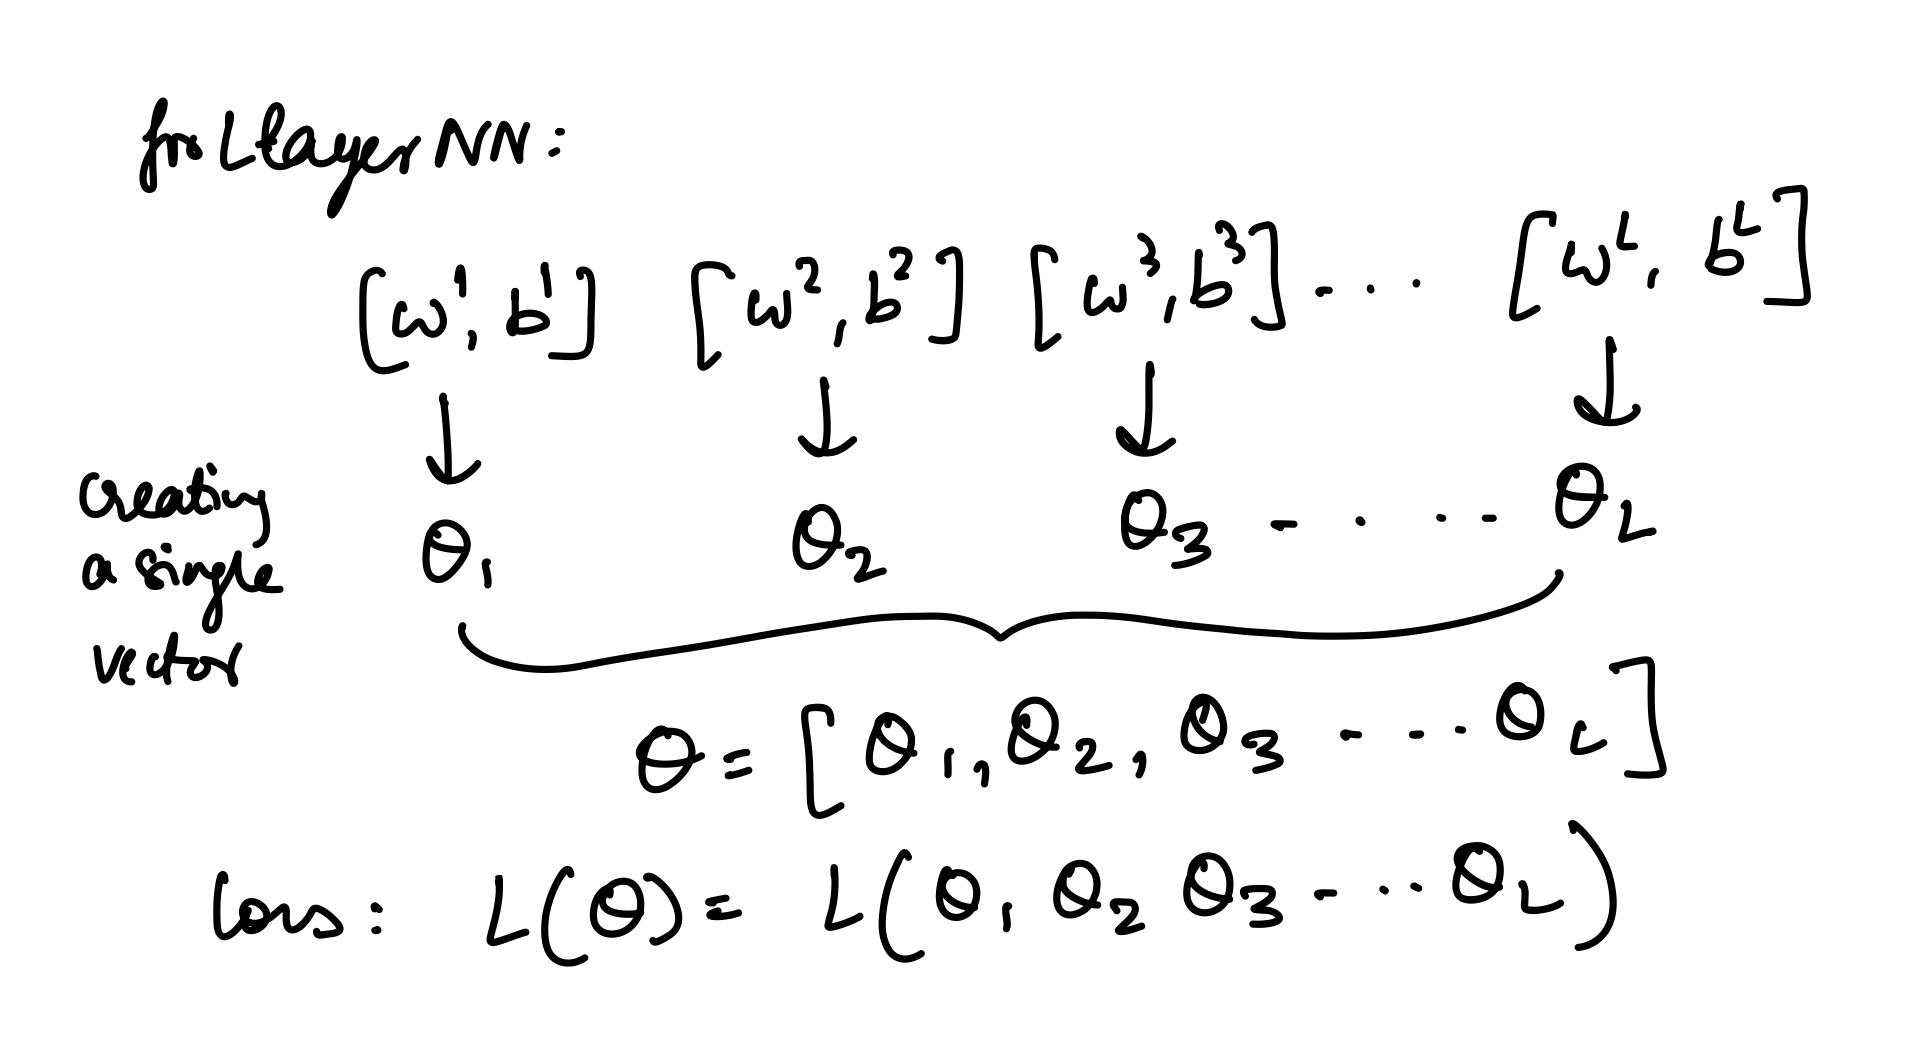

### How to implement gradient checking?
gradient checking is implemented as follows,

For $i$ in range($0$, $len(\theta)$),
- $d\theta_{approx}[i] = \frac{L(\theta_1, \theta_2, \theta_3, ...[\theta_i + \epsilon], ..., \theta_L) - L(\theta_1, \theta_2, \theta_3, ...[\theta_i - \epsilon], ..., \theta_L)}{2 \epsilon}$.

Then check how close,
- $d\theta_{approx}[i] ≈ \frac{\partial L}{\partial θ_i}$.

Note the value of $\epsilon = 10^{-7}$.

### How to evaluate if the difference in approximation and actual gradient is correct or not?
Check the value of $\frac{||d\theta_{approx}[i] - \Delta \theta_{i}||_2}{||d\theta_{approx}[i]||_2 + ||\Delta \theta_i||_2}$, then
- if the value is greater than or equal to $10^{-5}$ there is no issue.
- if the value is lesser than $10^{-5}$ then there is a problem in backpropagation.

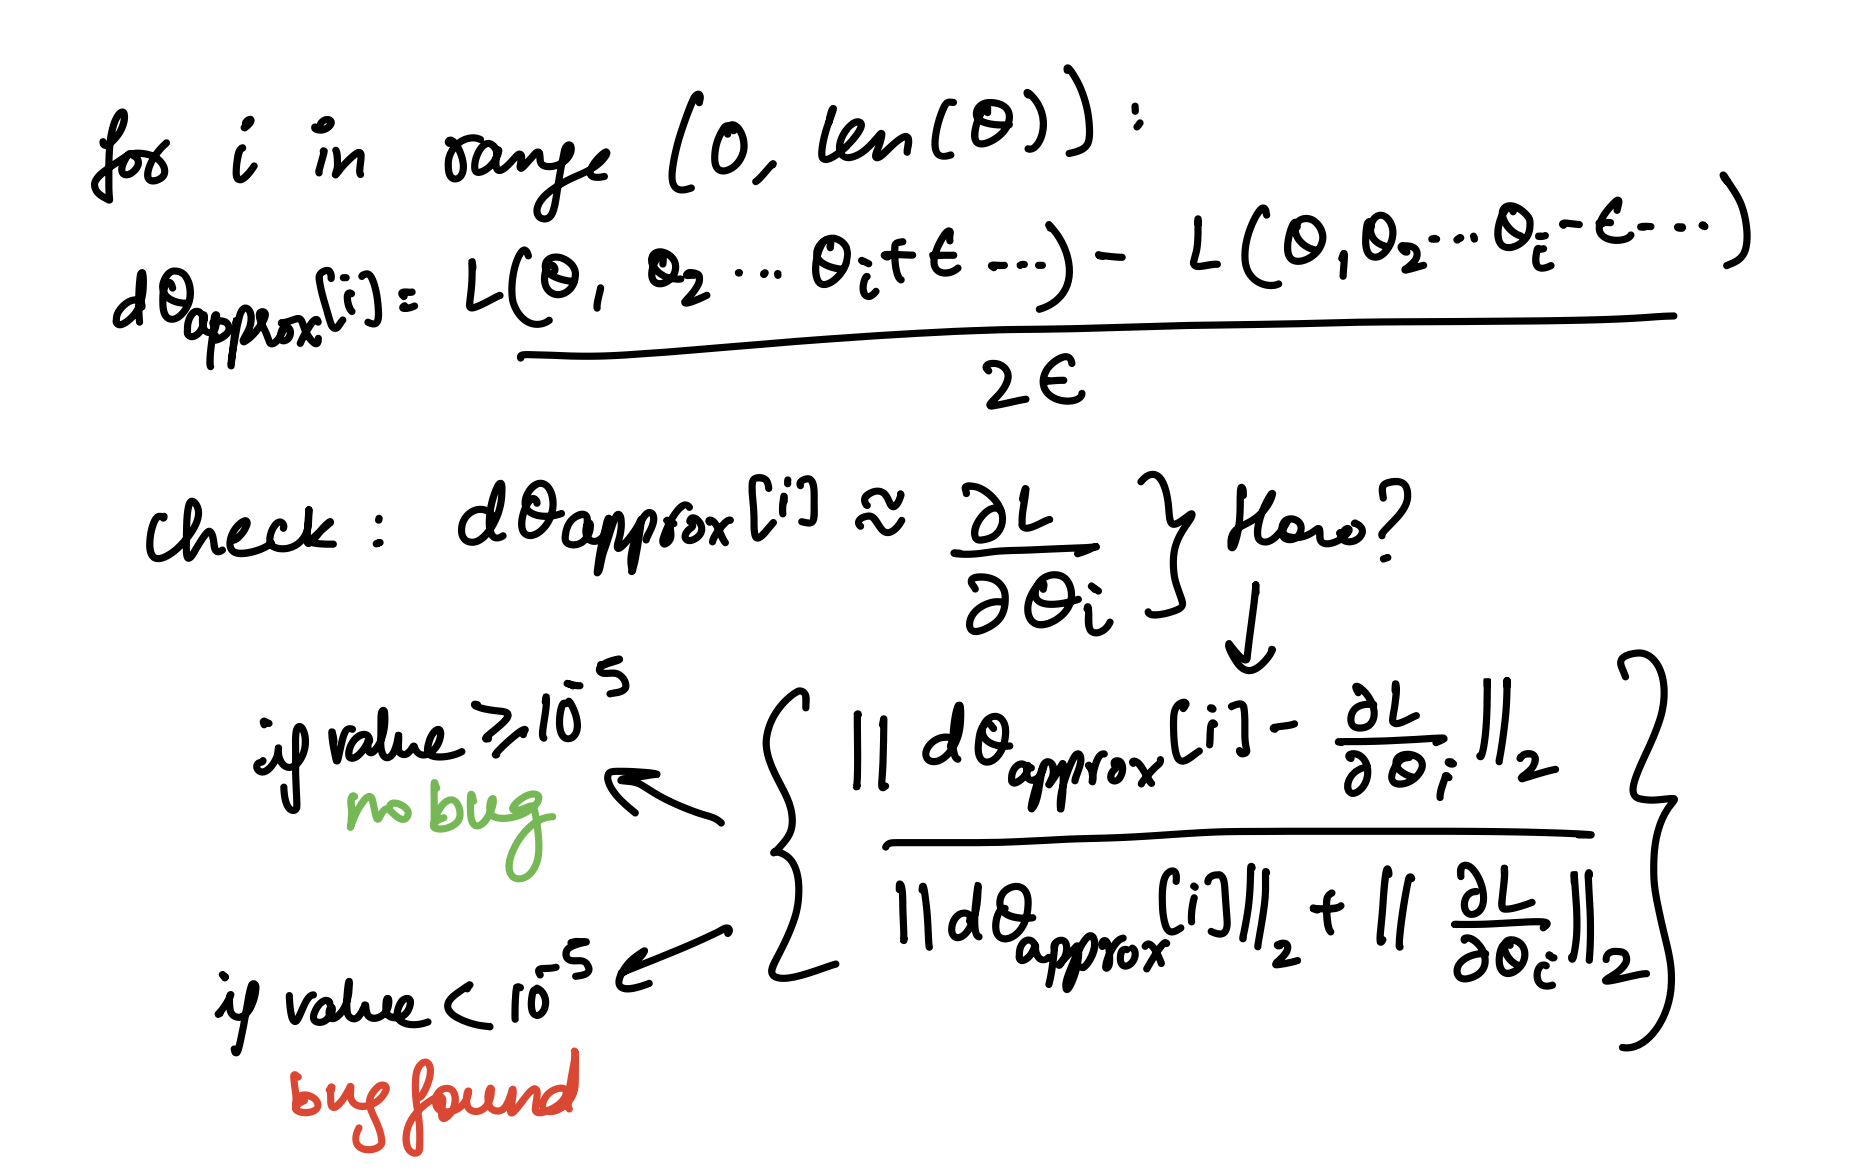

### What to do if the differene in the approximation and actual gradient is really high?
Check the weight $w^k$ and bias $b^k$ (where k is the k-th hidden layer) matrix for which the difference is high, then look for each weight or bias value to detect the bug.

### Should gradient checking be done during training?
No, since gradient checking is time intensive, it can only be performed during debugging only.

### Does gradient checking work with dropout?
No. Dropout drops Neurons randomly in every iteration, this increases the complexity of calculating the gradient of the loss function.